**HOME LOAN PREDICTION**

1: **IMPORT the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [2]:
home_loan = pd.read_csv("../joshm/loan_train.csv")

In [3]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
home_loan.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [5]:
home_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
home_loan.shape

(614, 13)

In [7]:
missing = home_loan.isnull().sum()

In [8]:
missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
missing = pd.concat([home_loan.isnull().sum(), 100 * home_loan.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [10]:
home_loan.T

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,12000,2400,3400,3987,3232,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0


In [11]:
home_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

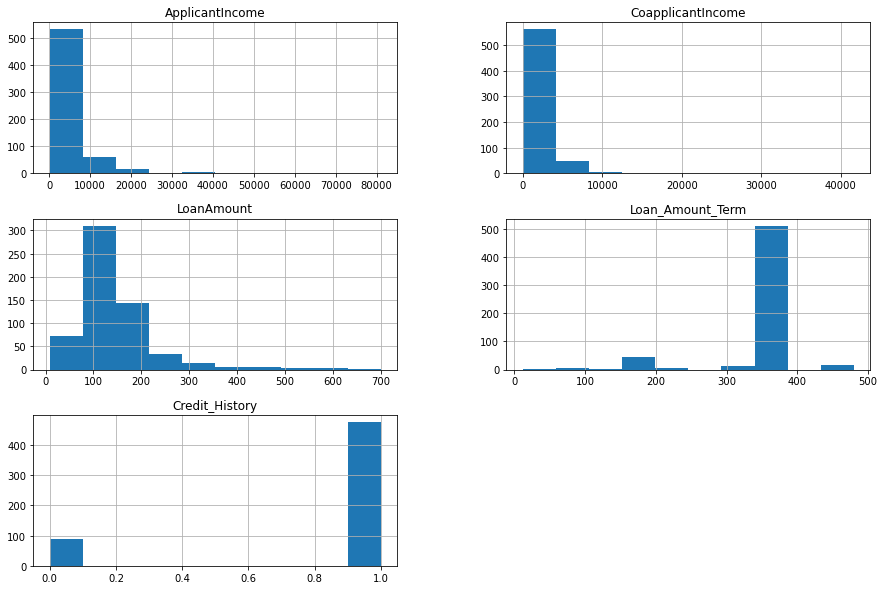

In [12]:
home_loan.hist(figsize=(15,10))

In [13]:
home_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [14]:
home_loan["Credit_History"].count()

564

In [15]:
home_loan["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
home_loan["Credit_History"].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

<AxesSubplot:title={'center':'Credit_History'}>

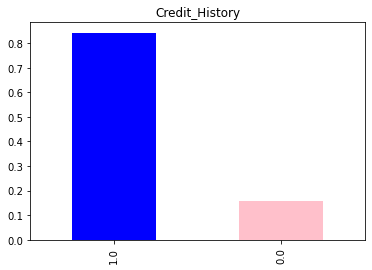

In [17]:
home_loan["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History", color= ['blue','pink'])

In [18]:
home_loan["Loan_Status"].count()

614

In [19]:
home_loan["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
home_loan["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

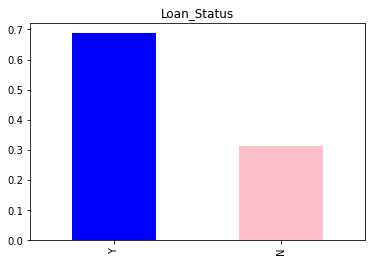

In [21]:
home_loan["Loan_Status"].value_counts(normalize=True).plot.bar(title = "Loan_Status", color= ['blue','pink'])

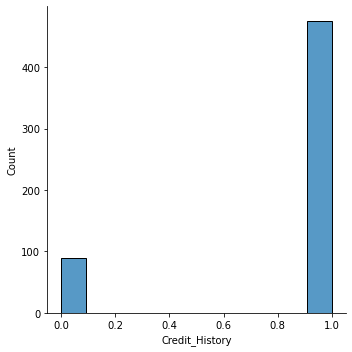

In [22]:
sns.displot(home_loan.Credit_History)

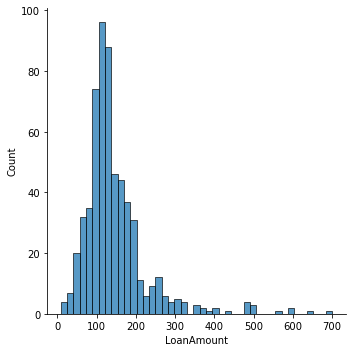

In [23]:
sns.displot(home_loan.LoanAmount)

In [24]:
home_loan['LoanAmount']= np.log(home_loan['LoanAmount'])

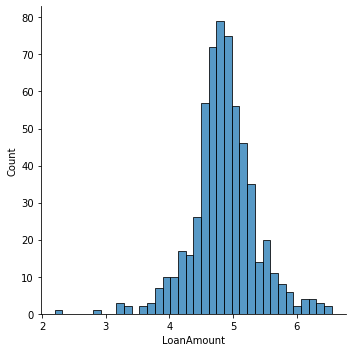

In [25]:
sns.displot(home_loan.LoanAmount)

In [26]:
home_loan["Gender"].count()

601

In [27]:
home_loan["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [28]:
home_loan["Gender"].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

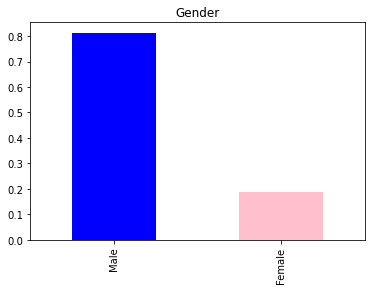

In [29]:
home_loan["Gender"].value_counts(normalize=True).plot.bar(title="Gender", color = ['blue', 'pink'])

In [30]:
home_loan["Married"].count()

611

In [31]:
home_loan["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [32]:
home_loan["Married"].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Married'}>

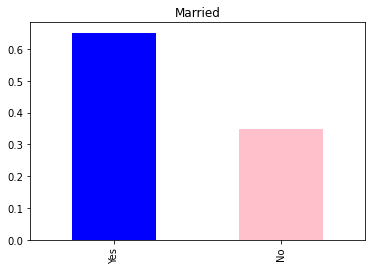

In [33]:
home_loan["Married"].value_counts(normalize=True).plot.bar(title="Married", color = ['blue', 'pink'])

In [34]:
home_loan["Dependents"].count()

599

In [35]:
home_loan["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
home_loan["Dependents"].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

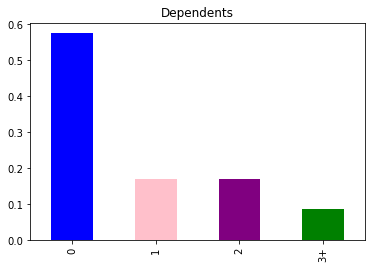

In [37]:
home_loan["Dependents"].value_counts(normalize=True).plot.bar(title='Dependents', color=['blue','pink','purple','green'])

In [38]:
home_loan["Education"].count()

614

In [39]:
home_loan["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [40]:
home_loan["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:title={'center':'Education'}>

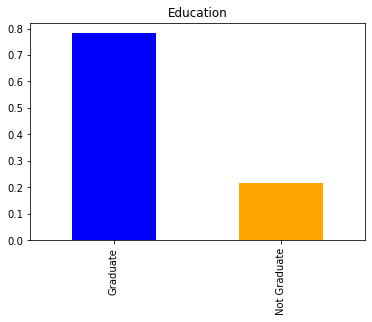

In [41]:
home_loan["Education"].value_counts(normalize=True).plot.bar(title="Education", color = ['blue', 'orange'])

In [42]:
home_loan["Property_Area"].count()

614

In [43]:
home_loan["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [44]:
home_loan["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:title={'center':'Property_Area'}>

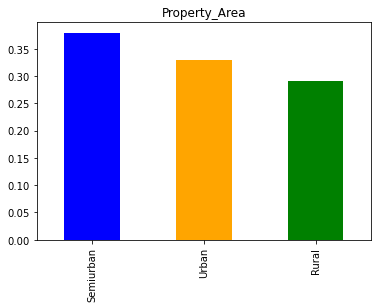

In [45]:
home_loan["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area", color = ['blue', 'orange','green'])

In [46]:
home_loan["Self_Employed"].count()

582

In [47]:
home_loan["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [48]:
home_loan["Self_Employed"].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

<AxesSubplot:title={'center':'Self_Employed'}>

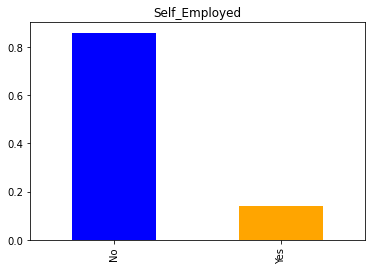

In [49]:
home_loan["Self_Employed"].value_counts(normalize=True).plot.bar(title = "Self_Employed", color= ['blue', 'orange'])

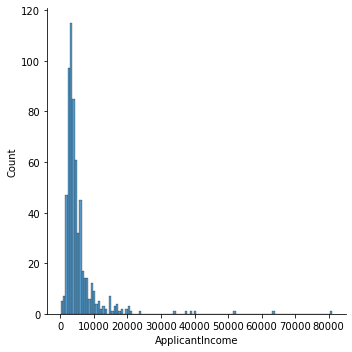

In [50]:
sns.displot(home_loan.ApplicantIncome)

In [51]:
home_loan['ApplicantIncome']= np.log(home_loan['ApplicantIncome'])

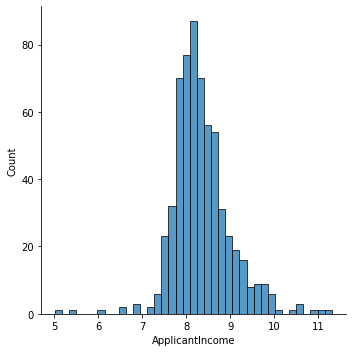

In [52]:
sns.displot(home_loan.ApplicantIncome)

<AxesSubplot:>

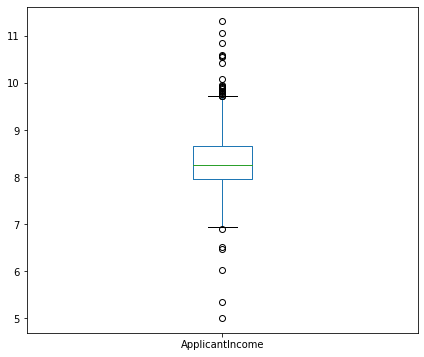

In [53]:
home_loan["ApplicantIncome"].plot.box(figsize=(7,6))

The boxplot shows presence of outliers in the 'ApplicantIncome' variable. This can be attributed to the income disparity in the society.

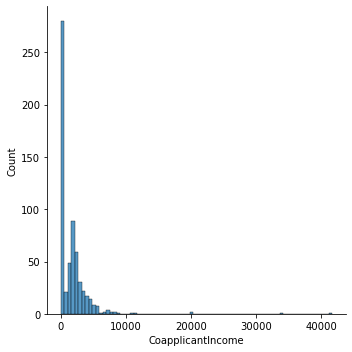

In [54]:
sns.displot(home_loan.CoapplicantIncome)

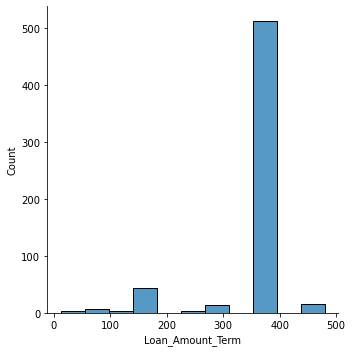

In [55]:
sns.displot(home_loan.Loan_Amount_Term)

In [56]:
home_loan['Loan_Amount_Term']= np.log(home_loan['Loan_Amount_Term'])

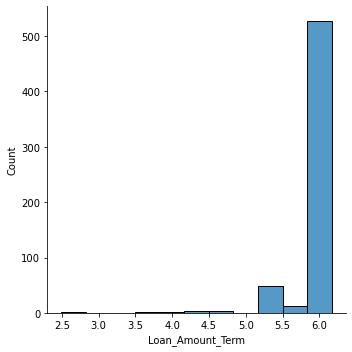

In [57]:
sns.displot(home_loan.Loan_Amount_Term)

<AxesSubplot:>

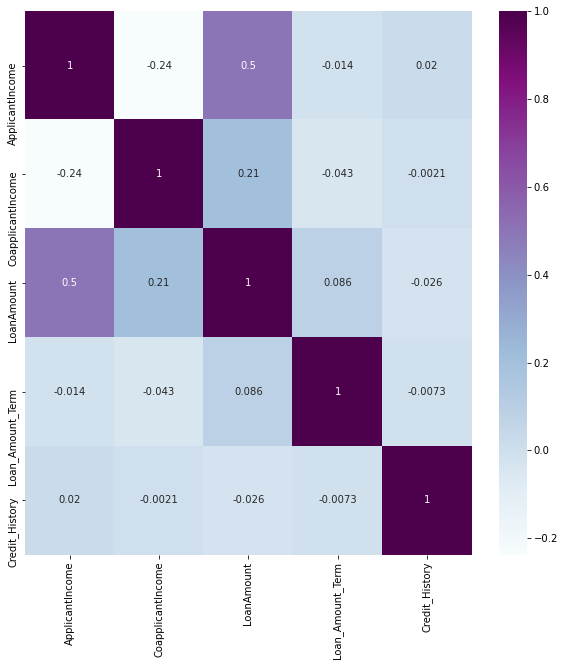

In [58]:
corr = home_loan.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap= "BuPu")

In [61]:
home_loan['CoapplicantIncome']=home_loan['CoapplicantIncome'].astype(int)

In [67]:
home_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int32
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [68]:
home_loan['TotalIncome']= home_loan['ApplicantIncome']+ home_loan['CoapplicantIncome']

In [69]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,8,0,NaN,5.886104,1.0,Urban,Y,8
1,LP001003,Male,Yes,1,Graduate,No,8,1508,4.852030,5.886104,1.0,Rural,N,1516
2,LP001005,Male,Yes,0,Graduate,Yes,8,0,4.189655,5.886104,1.0,Urban,Y,8
3,LP001006,Male,Yes,0,Not Graduate,No,7,2358,4.787492,5.886104,1.0,Urban,Y,2365
4,LP001008,Male,No,0,Graduate,No,8,0,4.948760,5.886104,1.0,Urban,Y,8


<AxesSubplot:xlabel='Loan_Status', ylabel='TotalIncome'>

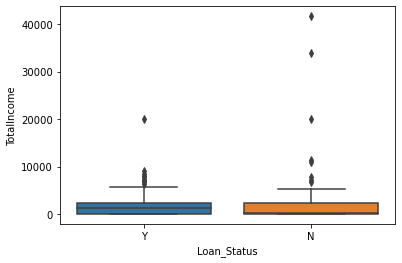

In [71]:
sns.boxplot(x="Loan_Status", y="TotalIncome", data = home_loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

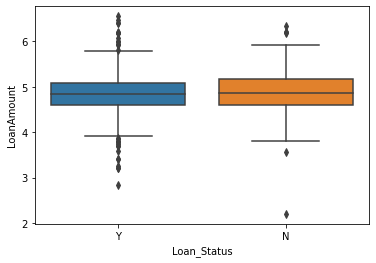

In [72]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data = home_loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

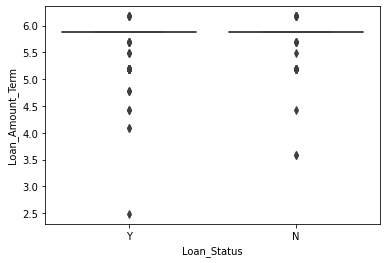

In [73]:
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data = home_loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

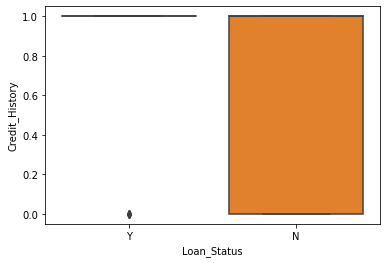

In [74]:
sns.boxplot(x="Loan_Status", y="Credit_History", data = home_loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

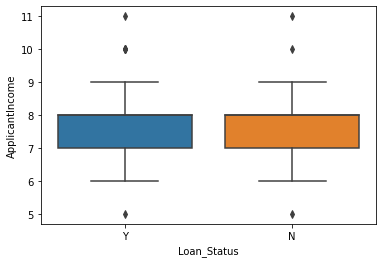

In [75]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data = home_loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

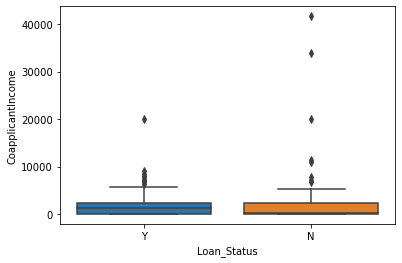

In [76]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data = home_loan)

In [77]:
columns=['Loan_Status','Gender', 'Married', 'Education','Self_Employed','Property_Area','Dependents']
le = LabelEncoder()
for column in columns:
    home_loan[column]= le.fit_transform(home_loan[column])

In [78]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,8,0,NaN,5.886104,1.0,2,1,8
1,LP001003,1,1,1,0,0,8,1508,4.852030,5.886104,1.0,0,0,1516
2,LP001005,1,1,0,0,1,8,0,4.189655,5.886104,1.0,2,1,8
3,LP001006,1,1,0,1,0,7,2358,4.787492,5.886104,1.0,2,1,2365
4,LP001008,1,0,0,0,0,8,0,4.948760,5.886104,1.0,2,1,8


<AxesSubplot:>

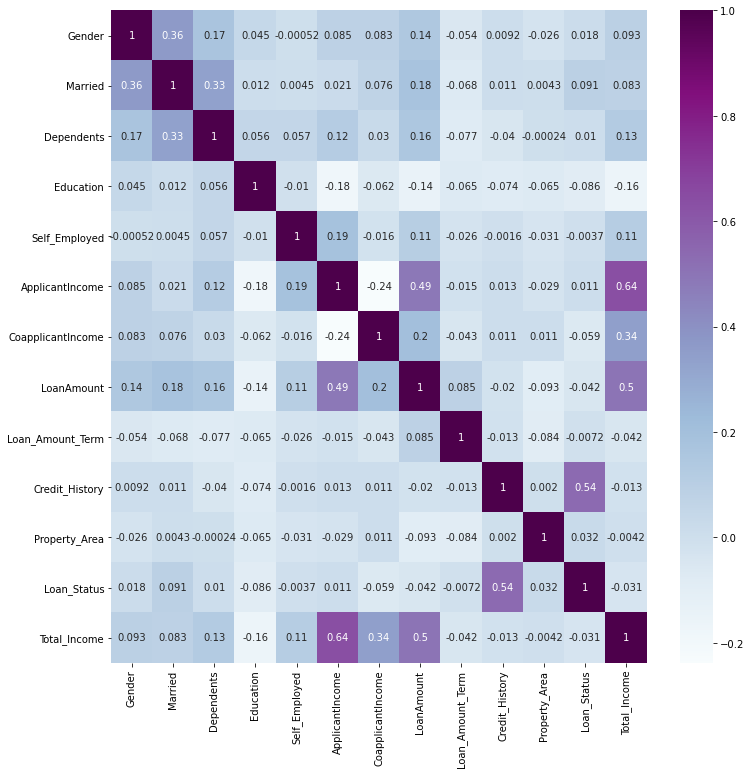

In [273]:
corr = home_loan.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True, cmap= "BuPu")

In [79]:
home_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.067321,0.073308,0.162949,-0.046846,-0.000515,-0.030903,0.008690,0.073328
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.013660,0.069877,0.183676,-0.066402,0.010690,0.007973,0.096657,0.069884
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.149277,0.011146,0.138065,-0.056682,-0.079801,0.032600,-0.007318,0.011182
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.190215,-0.062290,-0.149400,-0.067377,-0.081822,-0.065243,-0.085884,-0.062339
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.032900,0.052219,0.086841,-0.019600,0.056894,-0.013439,0.010880,0.052229
ApplicantIncome,0.067321,0.013660,0.149277,-0.190215,0.032900,1.000000,-0.220022,0.431859,-0.035768,0.005796,-0.007579,-0.007228,-0.219791
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052219,-0.220022,1.000000,0.207122,-0.043184,-0.002057,0.010521,-0.059188,1.000000
LoanAmount,0.162949,0.183676,0.138065,-0.149400,0.086841,0.431859,0.207122,1.000000,0.086327,-0.026084,-0.097316,-0.039100,0.207236
Loan_Amount_Term,-0.046846,-0.066402,-0.056682,-0.067377,-0.019600,-0.035768,-0.043184,0.086327,1.000000,-0.007254,-0.085613,-0.006708,-0.043195
Credit_History,-0.000515,0.010690,-0.079801,-0.081822,0.056894,0.005796,-0.002057,-0.026084,-0.007254,1.000000,-0.001969,0.561678,-0.002055


In [80]:
home_loan['Loan_Status'].corr(home_loan['Gender'])

0.008689626040697904

In [81]:
home_loan['Loan_Status'].corr(home_loan['Married'])

0.09665723906730823

In [82]:
home_loan['Loan_Status'].corr(home_loan['Dependents'])

-0.007318095112490163

In [83]:
home_loan['Loan_Status'].corr(home_loan['Education'])

-0.0858839146753654

In [84]:
home_loan['Loan_Status'].corr(home_loan['Self_Employed'])

0.01088008538198556

In [85]:
home_loan['Loan_Status'].corr(home_loan['ApplicantIncome'])

-0.007227943226206615

In [86]:
home_loan['Loan_Status'].corr(home_loan['CoapplicantIncome'])

-0.05918765124189558

In [89]:
home_loan['Loan_Status'].corr(home_loan['TotalIncome'])

-0.05919255132320675

In [90]:
home_loan['Loan_Status'].corr(home_loan['Property_Area'])

0.03211198462880024

In [91]:
home_loan['Loan_Status'].corr(home_loan['Credit_History'])

0.5616781574653806

In [92]:
home_loan['Loan_Status'].corr(home_loan['LoanAmount'])

-0.03909990075631294

In [93]:
home_loan['Loan_Status'].corr(home_loan['Loan_Amount_Term'])

-0.006708108010630588

**Filling the missing values**

In [96]:
home_loan['LoanAmount']=home_loan['LoanAmount'].fillna(home_loan['LoanAmount'].mean())

In [97]:
home_loan['Loan_Amount_Term']=home_loan['Loan_Amount_Term'].fillna(home_loan['Loan_Amount_Term'].mean())

In [98]:
home_loan['Credit_History']=home_loan['Credit_History'].fillna(home_loan['Credit_History'].mode()[0])

In [99]:
home_loan['Gender']=home_loan['Gender'].fillna(home_loan['Gender'].mode()[0])

In [100]:
home_loan['Married']=home_loan['Married'].fillna(home_loan['Married'].mode()[0])

In [101]:
home_loan['Dependents']=home_loan['Dependents'].fillna(home_loan['Dependents'].mode()[0])

In [102]:
home_loan['Self_Employed']=home_loan['Self_Employed'].fillna(home_loan['Self_Employed'].mode()[0])

In [103]:
missing = home_loan.isnull().sum()

In [104]:
missing

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [105]:
home_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.067321,0.073308,0.160991,-0.046328,-0.003844,-0.030903,0.008690,0.073328
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.013660,0.069877,0.179506,-0.065656,0.014896,0.007973,0.096657,0.069884
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.149277,0.011146,0.134316,-0.055848,-0.082888,0.032600,-0.007318,0.011182
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.190215,-0.062290,-0.145790,-0.066058,-0.073658,-0.065243,-0.085884,-0.062339
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.032900,0.052219,0.085376,-0.019325,0.062019,-0.013439,0.010880,0.052229
ApplicantIncome,0.067321,0.013660,0.149277,-0.190215,0.032900,1.000000,-0.220022,0.424775,-0.035586,-0.001246,-0.007579,-0.007228,-0.219791
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052219,-0.220022,1.000000,0.206254,-0.043038,0.011134,0.010521,-0.059188,1.000000
LoanAmount,0.160991,0.179506,0.134316,-0.145790,0.085376,0.424775,0.206254,1.000000,0.085250,-0.018588,-0.095156,-0.038155,0.206367
Loan_Amount_Term,-0.046328,-0.065656,-0.055848,-0.066058,-0.019325,-0.035586,-0.043038,0.085250,1.000000,-0.010536,-0.084387,-0.006615,-0.043049
Credit_History,-0.003844,0.014896,-0.082888,-0.073658,0.062019,-0.001246,0.011134,-0.018588,-0.010536,1.000000,0.001963,0.540556,0.011134


<AxesSubplot:>

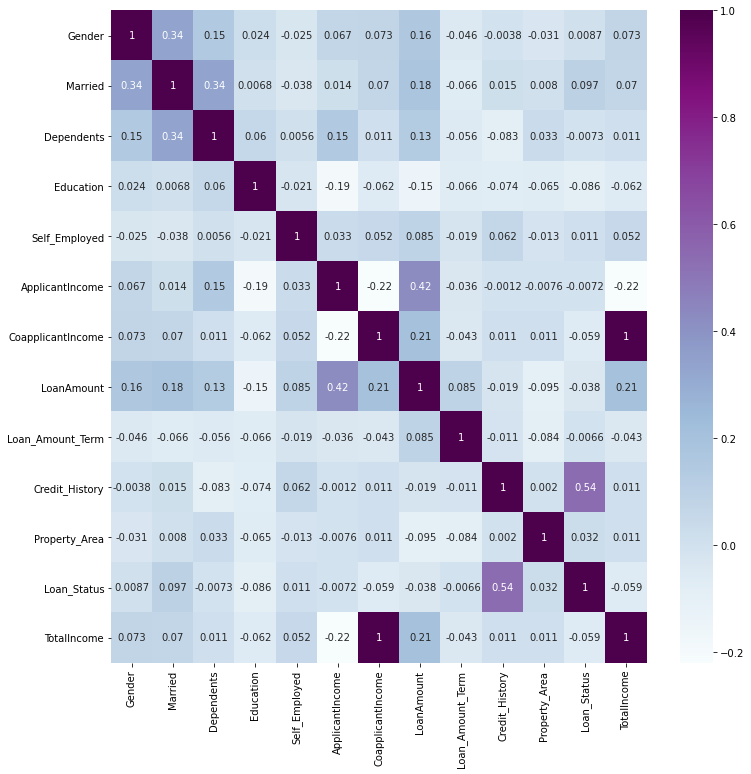

In [106]:
corr = home_loan.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True, cmap= "BuPu")